# Car Evaluation Using Machine Learning

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

The **Attribute Values** are:
* buying:       v-high, high, med, low
* maint:        v-high, high, med, low
* doors:        2, 3, 4, 5-more
* persons:      2, 4, more
* lug_boot     small, med, big
* safety:       low, med, high

and the **Class Values** are
* unacc
* acc
* good
* v-good

The goal of this assessment is to examine several Machine Learning algorithms and to compare their accuracy. 

In [352]:
###Import the numpy and pandas 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
%matplotlib inline

In [354]:
##read the csv file
df=pd.read_csv("dataset.csv", sep=",")

##return the dimensions of the df
df.shape

(1728, 7)

In [355]:
##return the first 5 rows
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Exploratory Analysis

At this point we will do an exploratory analysis of the data. As we saw earlier our dataset contains 1728 rows and 7 columns. The first 6 columns are the **features/attributes** and the 7th column is the **Class Value** that we would like to be able to predict.
At the beginning it would be nice to see the distribution of the Class Value in the dataset.
So from the table below we can see that the majority of the Cars (70%) are labelled as "unacc" and then it follows the "acc" (22%). The last two Class Values are the "good" and "vgood" respectively. 
Another importan observation is that the values of all features are **balanced** in the dataset meaning that they have the same number of obsevations per feature level. This can be shown easily from the bar plots of "buying", "maint", "doors", "persons", "lug_boot" and "safety" which are the same for each level.
Later we continue the analysis by representing the data in more than two dimensions and more specifically up to three dimensions using the facets. From the plots we can see that within features the proportion of **Class Values** is not the same, hence there is a pattern there which can be captured by applying and advanced Machine Learning algorithm.

In [356]:
##get the counts
df1=DataFrame(df.groupby(['class_values']).size().rename('Counts'))

##get the percentage over total
df2=DataFrame(df.groupby(['class_values']).size(). apply
              (lambda x: float(x) / df.groupby('class_values').size().sum()*100).round(2).rename('Percentage'))

In [357]:
df12=pd.concat([df1,df2], axis=1)
df12

,Counts,Percentage
class_values,,
acc,384,22.22
good,69,3.99
unacc,1210,70.02
vgood,65,3.76


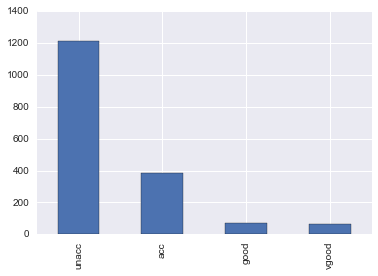

In [361]:
##We can also create a bar plot
df.class_values.value_counts().plot(kind='bar')
plt.savefig('fig1.png')

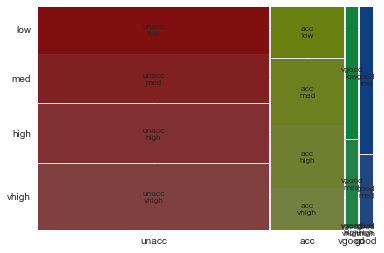

In [362]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 10.0
mosaic(df, ['class_values', 'buying']);
plt.savefig('fig2.png')

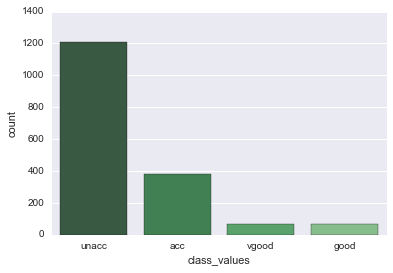

In [363]:
sns.countplot(x="class_values", data=df, palette="Greens_d");
plt.savefig('fig3.png')


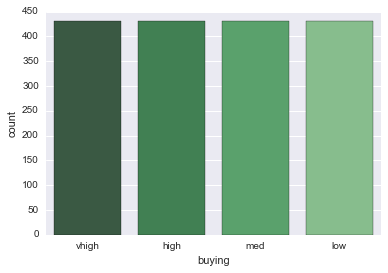

In [364]:
sns.countplot(x="buying", data=df, palette="Greens_d");
plt.savefig('fig4.png')

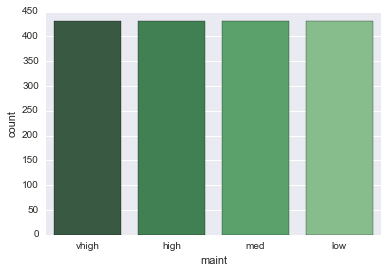

In [365]:
sns.countplot(x="maint", data=df, palette="Greens_d");
plt.savefig('fig5.png')

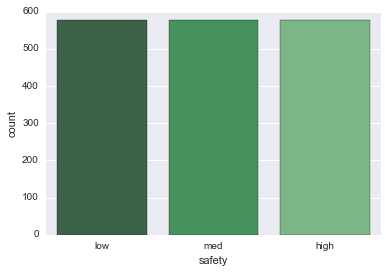

In [366]:
sns.countplot(x="safety", data=df, palette="Greens_d");
plt.savefig('fig6.png')

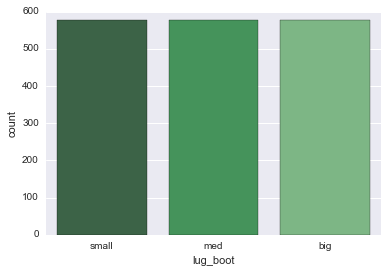

In [367]:
sns.countplot(x="lug_boot", data=df, palette="Greens_d");
plt.savefig('fig7.png')

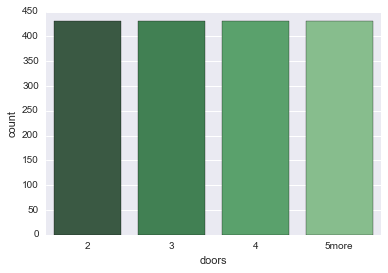

In [368]:
sns.countplot(x="doors", data=df, palette="Greens_d");
plt.savefig('fig8.png')

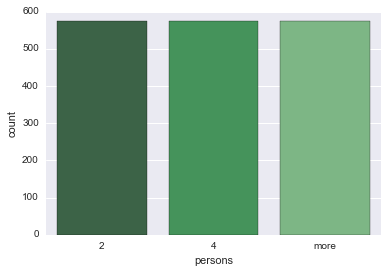

In [369]:
sns.countplot(x="persons", data=df, palette="Greens_d");
plt.savefig('fig9.png')

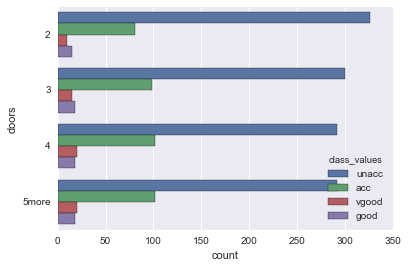

In [370]:
sns.countplot(y="doors", hue="class_values", data=df);
plt.savefig('fig10.png')

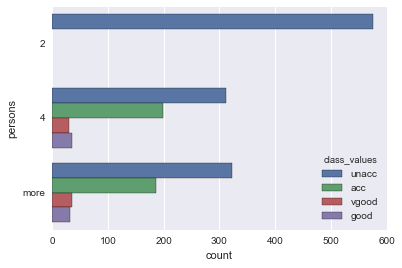

In [371]:
sns.countplot(y="persons", hue="class_values", data=df);
plt.savefig('fig11.png')

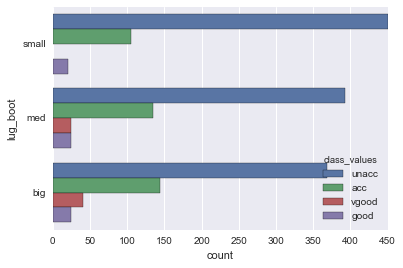

In [372]:
sns.countplot(y="lug_boot", hue="class_values", data=df);
plt.savefig('fig12.png')

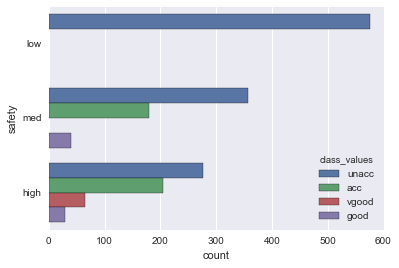

In [373]:
sns.countplot(y="safety", hue="class_values", data=df);
plt.savefig('fig13.png')

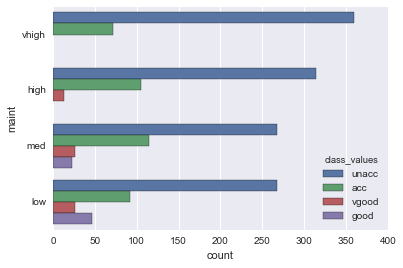

In [374]:
sns.countplot(y="maint", hue="class_values", data=df);
plt.savefig('fig4.png')

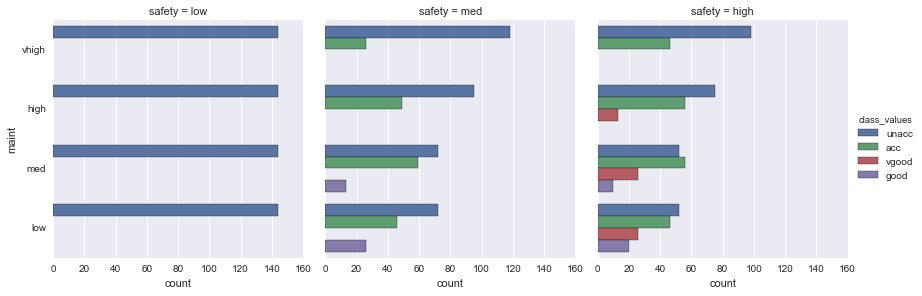

In [375]:
sns.factorplot(y="maint", hue="class_values", kind='count', col="safety", data=df);
plt.savefig('fig15.png')

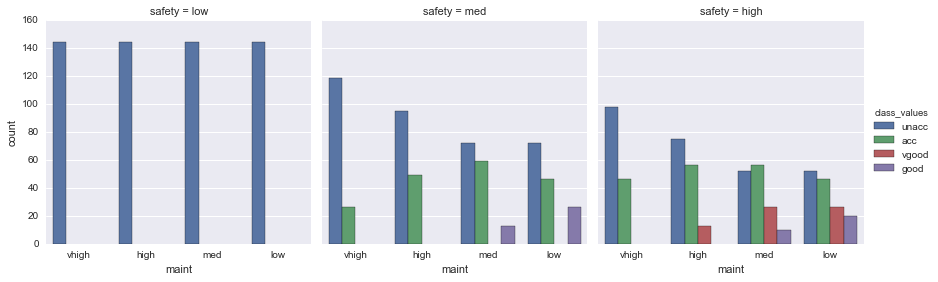

In [376]:
sns.factorplot("maint", hue="class_values", kind='count', col="safety", data=df);
plt.savefig('fig16.png')

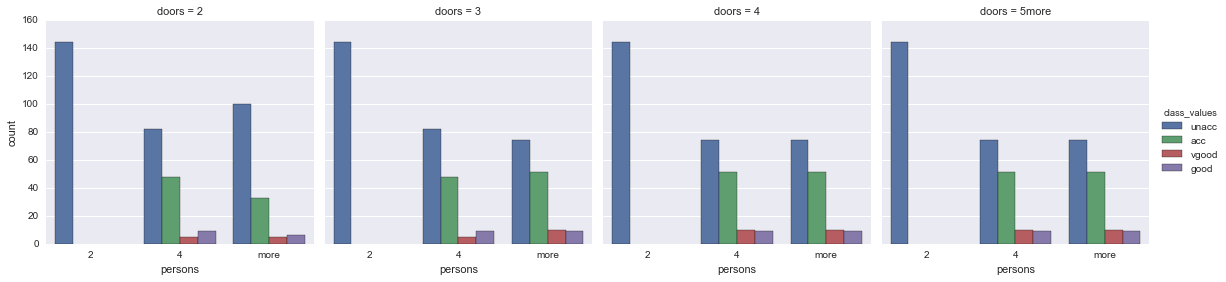

In [377]:
sns.factorplot("persons", hue="class_values", kind='count', col="doors", data=df);
plt.savefig('fig17.png')

# Random Forest

In [378]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [379]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)

In [380]:
Xinitial=df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
Y=DataFrame(df['class_values'])

In [381]:
##Convert the categorical variables to dummy by using 0 or 1
X=pd.get_dummies(Xinitial)
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [382]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=3)

In [383]:
clf.fit(X_train, np.array(Y_train).ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [384]:
###Accuracy Rate
sum(np.array(Y_test).ravel()==clf.predict(X_test))*100.0/len(clf.predict(X_test))

96.146435452793838

In [385]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test)
cnf_matrix =confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

In [386]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm=cm.round(2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[120   1   8   0]
 [  1  12   0   0]
 [  5   0 349   0]
 [  5   0   0  18]]


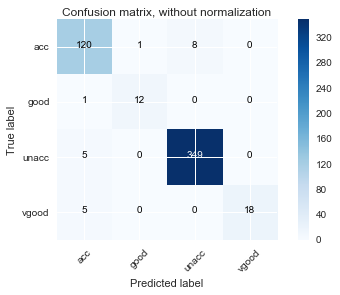

In [387]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'],
                      title='Confusion matrix, without normalization')

plt.savefig('fig18.png')

Normalized confusion matrix
[[ 0.93  0.01  0.06  0.  ]
 [ 0.08  0.92  0.    0.  ]
 [ 0.01  0.    0.99  0.  ]
 [ 0.22  0.    0.    0.78]]


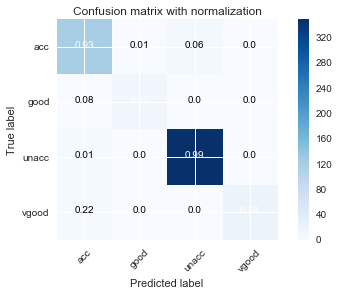

In [388]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'], normalize=True,
                      title='Confusion matrix with normalization')
plt.savefig('fig19.png')

# Decision Trees

In [389]:
from sklearn import tree

In [390]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [391]:
###Accuracy Rate
sum(np.array(Y_test).ravel()==clf.predict(X_test))*100.0/len(clf.predict(X_test))

95.568400770712913

Confusion matrix, without normalization
[[117   1  11   0]
 [  0  11   0   2]
 [  5   0 349   0]
 [  3   1   0  19]]


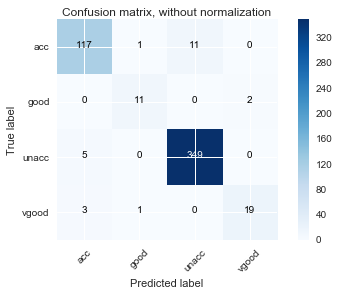

In [392]:
# Again the confusion matrix
y_pred=clf.predict(X_test)
cnf_matrix =confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'],
                      title='Confusion matrix, without normalization')
plt.savefig('fig20.png')

Normalized confusion matrix
[[ 0.91  0.01  0.09  0.  ]
 [ 0.    0.85  0.    0.15]
 [ 0.01  0.    0.99  0.  ]
 [ 0.13  0.04  0.    0.83]]


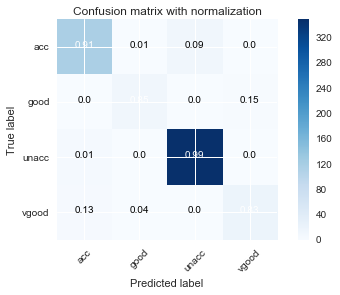

In [393]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'], normalize=True,
                      title='Confusion matrix with normalization')
plt.savefig('fig21.png')

# KNN

In [394]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)  ### k equal to 5
knn.fit(X_train, np.array(Y_train).ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [395]:
y_pred=knn.predict(X_test)

In [396]:
###Accuracy Rate
sum(np.array(Y_test).ravel()==knn.predict(X_test))*100.0/len(knn.predict(X_test))

89.017341040462426

Confusion matrix, without normalization
[[ 97   4  28   0]
 [  4   8   1   0]
 [  6   0 348   0]
 [  7   4   3   9]]


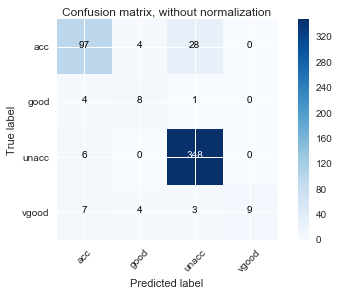

In [397]:
# Again the confusion matrix
y_pred=knn.predict(X_test)
cnf_matrix =confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'],
                      title='Confusion matrix, without normalization')
plt.savefig('fig22.png')

Normalized confusion matrix
[[ 0.75  0.03  0.22  0.  ]
 [ 0.31  0.62  0.08  0.  ]
 [ 0.02  0.    0.98  0.  ]
 [ 0.3   0.17  0.13  0.39]]


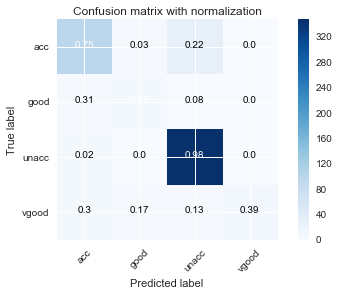

In [398]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'], normalize=True,
                      title='Confusion matrix with normalization')
plt.savefig('fig23.png')

# SVM

In [399]:
from sklearn.svm import SVC #IMPORT THE SUPPORT VECTOR CLASSIFICATION
model=SVC()

model.fit(X_train,np.array(Y_train).ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [400]:
y_pred=model.predict(X_test)
###Accuracy Rate
sum(np.array(Y_test).ravel()==model.predict(X_test))*100.0/len(model.predict(X_test))

89.980732177263974

Confusion matrix, without normalization
[[114   3  12   0]
 [ 10   3   0   0]
 [ 14   0 340   0]
 [ 13   0   0  10]]


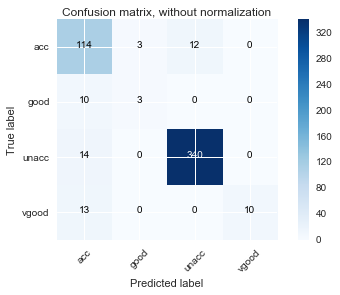

In [401]:
# Again the confusion matrix
y_pred=model.predict(X_test)
cnf_matrix =confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'],
                      title='Confusion matrix, without normalization')
plt.savefig('fig24.png')

Normalized confusion matrix
[[ 0.88  0.02  0.09  0.  ]
 [ 0.77  0.23  0.    0.  ]
 [ 0.04  0.    0.96  0.  ]
 [ 0.57  0.    0.    0.43]]


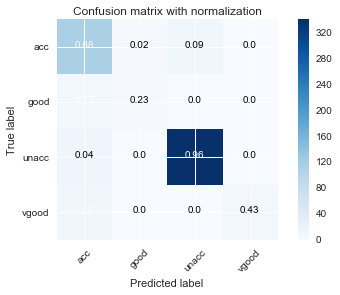

In [402]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc', 'good', 'unacc', 'vgood'], normalize=True,
                      title='Confusion matrix with normalization')
plt.savefig('fig25.png')

In [403]:
# Import all SVM 
from sklearn import svm
# SVM regularization parameter
C = 1.0  
# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X_train,np.array(Y_train).ravel())

In [404]:
###Accuracy Rate
sum(np.array(Y_test).ravel()==lin_svc.predict(X_test))*100.0/len(lin_svc.predict(X_test))

88.246628131021197